<a href="https://colab.research.google.com/github/im-brahim/SentimentOfClients/blob/main/Sentiment_of_the_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


## **Import data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/twitter_airlines_sentiment.csv", encoding='ISO-8859-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/newfile.csv', encoding='utf-8', index=False)

In [ ]:
(len(df) - df.count())/len(df)

_unit_id                        0.000000
_golden                         0.000000
_unit_state                     0.000000
_trusted_judgments              0.000000
_last_judgment_at               0.003825
airline_sentiment               0.000000
airline_sentiment:confidence    0.000000
negativereason                  0.373087
negativereason:confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_id                        0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

## **DROP COLOMN**

In [ ]:
df = df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1)

In [ ]:
(len(df) - df.count())/len(df)

_unit_id                        0.000000
_golden                         0.000000
_unit_state                     0.000000
_trusted_judgments              0.000000
_last_judgment_at               0.003825
airline_sentiment               0.000000
airline_sentiment:confidence    0.000000
negativereason                  0.373087
negativereason:confidence       0.281284
airline                         0.000000
name                            0.000000
retweet_count                   0.000000
text                            0.000000
tweet_created                   0.000000
tweet_id                        0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [ ]:
count=df['airline_sentiment'].value_counts()
count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

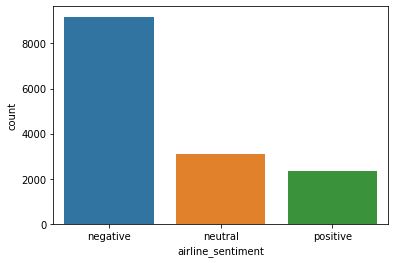

In [ ]:
sns.countplot(x='airline_sentiment',data=df,order=['negative','neutral','positive'])
plt.show()

In [ ]:
count_airlain = df["airline"].value_counts()
count_airlain

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

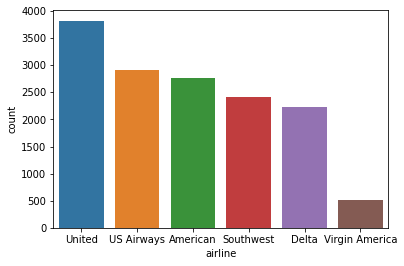

In [ ]:
sns.countplot(x="airline", data=df, order=df["airline"].value_counts().index)
plt.show()

<Axes: xlabel='airline'>

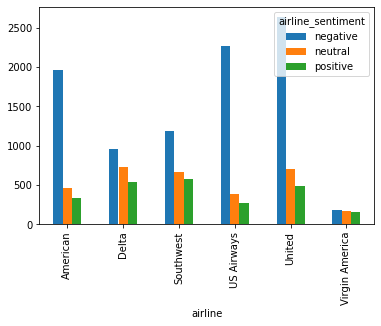

In [ ]:
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [ ]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

## **Cleaning**

In [ ]:
import re
import nltk
import time

In [ ]:
#remove words which are starts with @ symbols
df['text'] = df['text'].map(lambda x:re.sub('@\w*','',str(x)))
#remove special characters except [a-zA-Z]
df['text'] = df['text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))
#remove link starts with https
df['text'] = df['text'].map(lambda x:re.sub('http.*','',str(x)))


In [ ]:
df['text'].head()

0                                          What  said 
1     plus you ve added commercials to the experien...
2     I didn t today    Must mean I need to take an...
3     it s really aggressive to blast obnoxious  en...
4             and it s a really big bad thing about it
Name: text, dtype: object

In [ ]:
df['text'] = df['text'].map(lambda x:str(x).lower())

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
corpus = []

In [ ]:
none=df['text'].map(lambda x:corpus.append(' '.join([word for word in str(x).strip().split() if not word in set(stopwords.words('english'))])))  

In [ ]:
corpus[:4]

['said',
 'plus added commercials experience tacky',
 'today must mean need take another trip',
 'really aggressive blast obnoxious entertainment guests faces amp little recourse']

In [ ]:
df["text"].head(10)

0                                          what  said 
1     plus you ve added commercials to the experien...
2     i didn t today    must mean i need to take an...
3     it s really aggressive to blast obnoxious  en...
4             and it s a really big bad thing about it
5     seriously would pay     a flight for seats th...
6     yes  nearly every time i fly vx this    ear w...
7     really missed a prime opportunity for men wit...
8                   well  i didn t   but now i do    d
9     it was amazing  and arrived an hour early  yo...
Name: text, dtype: object

In [ ]:
df.loc[:, 'text'] = corpus

In [ ]:
df["text"].head(10)

0                                                 said
1              plus added commercials experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
5    seriously would pay flight seats playing reall...
6        yes nearly every time fly vx ear worm go away
7    really missed prime opportunity men without ha...
8                                                 well
9                      amazing arrived hour early good
Name: text, dtype: object

## **Some Visualization**

In [ ]:
listOfAirlines = df['airline'].unique()
listOfAirlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
neutralCount = []
positiveCount = []
negativeCount = []
totalCount = []

for airline in listOfAirlines:
    neuC = df.query("airline == @airline and airline_sentiment == 'neutral'")['airline_sentiment:confidence'].sum()
    posC = df.query("airline == @airline and airline_sentiment == 'positive'")['airline_sentiment:confidence'].sum()
    negC = df.query("airline == @airline and airline_sentiment == 'negative'")['airline_sentiment:confidence'].sum()
    tot = neuC + posC + negC
    neutralCount.append(neuC)
    positiveCount.append(posC)
    negativeCount.append(negC)
    totalCount.append(tot)

ddf2 = pd.DataFrame(index=listOfAirlines);
ddf2['Neutral Count'] = neutralCount
ddf2['Positive Count'] = positiveCount
ddf2['Negative Count'] = negativeCount
ddf2

,Neutral Count,Positive Count,Negative Count
Virgin America,143.3610,134.9727,163.2137
United,564.4000,421.1578,2457.5967
Southwest,548.5365,505.0800,1091.7521
Delta,599.5580,471.7084,861.6031
US Airways,313.1524,231.2555,2140.1501
American,382.4092,296.4536,1852.1112


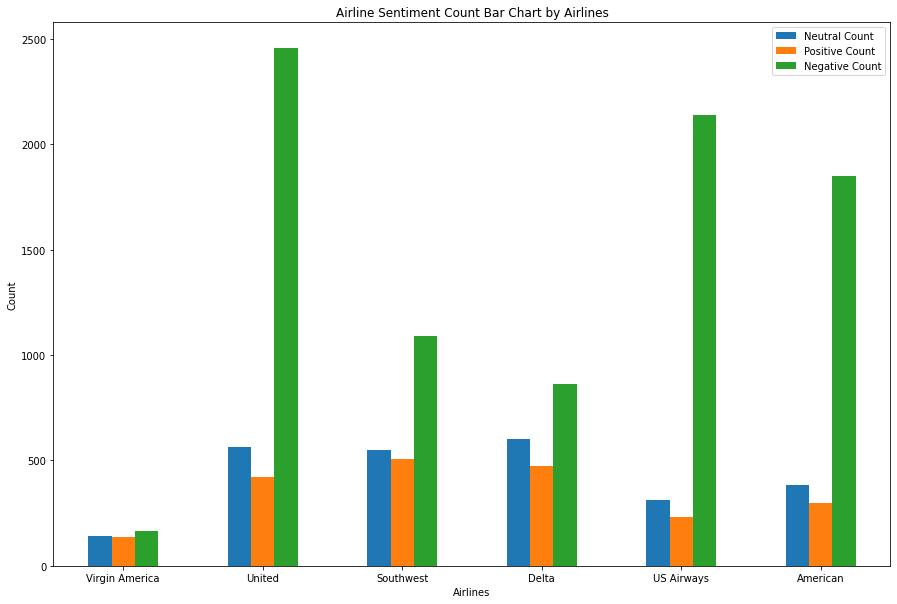

In [ ]:
plt2 = ddf2.plot.bar(rot=0, figsize=(15,10))

# Add title and axis names
plt.title('Airline Sentiment Count Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

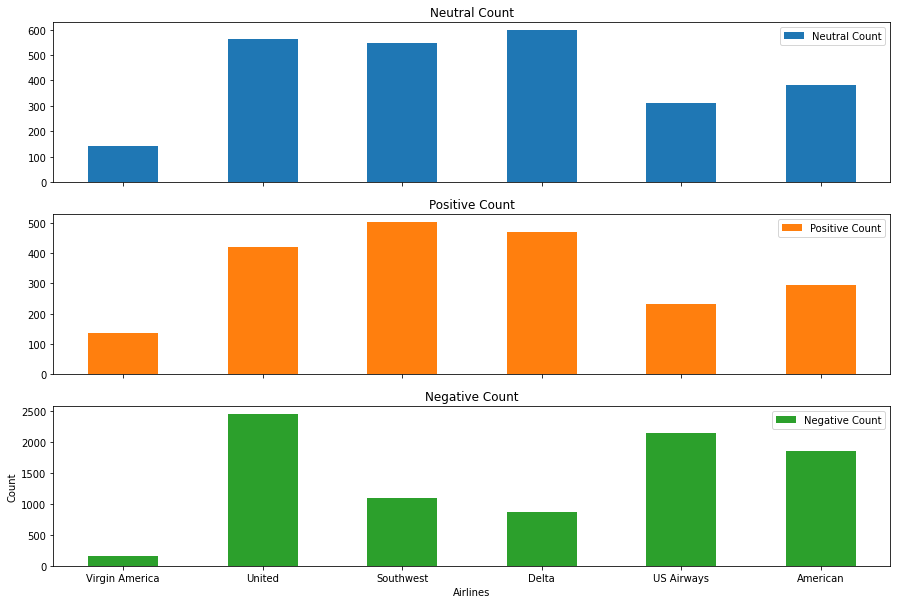

In [ ]:
plt3 = ddf2.plot.bar(rot=0, subplots=True, figsize=(15,10))

# Add axis names
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
negative_text = df[df['airline_sentiment'] == 'negative']['text']
positive_text = df[df['airline_sentiment'] == 'positive']['text']

In [ ]:
def count_words(texts):
    result = {}
    for text in texts:
        text_arr = text.split(' ')
        for word in text_arr:
            # exclude empty string
            if word == '':
                continue
            # increase the frequency count in the returning dict
            if word in result:
                count = result[word]
                result[word] = count + 1
            else:
                result[word] = 1
    return result

In [ ]:
negative_dict = count_words(negative_text)
positive_dict = count_words(positive_text)

## Wordcloud for Word Frequency from all Negative Feedback

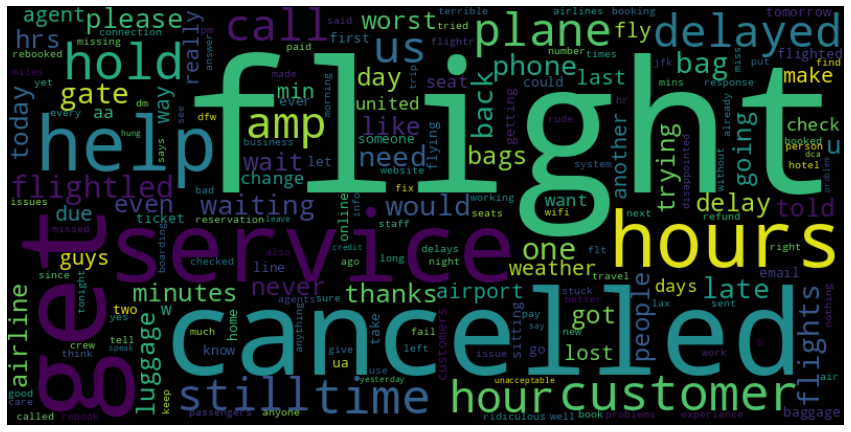

In [ ]:
negative_wordcloud = WordCloud(background_color="black", width=800, height=400)
negative_wordcloud.generate_from_frequencies(negative_dict)
plt.figure(figsize=(15,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Wordcloud for Word Frequency from all Positive Feedback

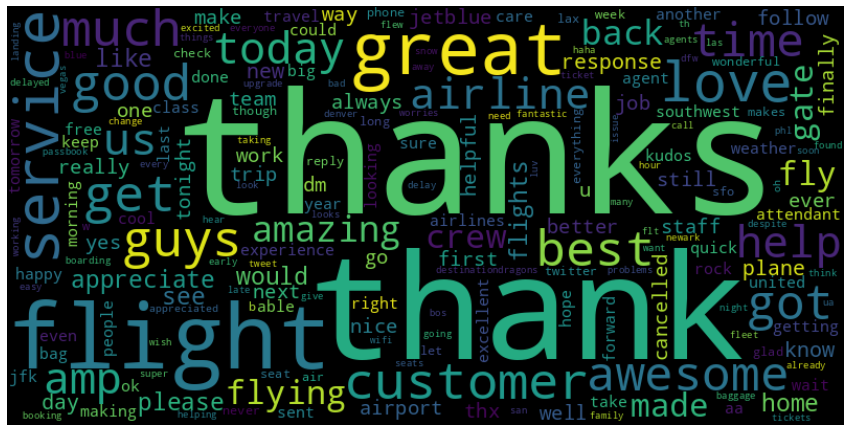

In [ ]:
positive_wordcloud = WordCloud(background_color="black", width=800, height=400)
positive_wordcloud.generate_from_frequencies(positive_dict)
plt.figure(figsize=(15,10))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Split data into Train and Test for Logistique regretion:**

In [ ]:
X = pd.DataFrame(data=corpus,columns=['comment_text'])

In [ ]:
Y = df['airline_sentiment'].map({'neutral':1,'negative':-1,'positive':1})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(11712, 1) (2928, 1) (11712,) (2928,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector = TfidfVectorizer(stop_words='english',sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{2,}',ngram_range=(1,1),max_features=30000)

In [ ]:
X_train_word_feature = vector.fit_transform(X_train['comment_text']).toarray()
X_test_word_feature = vector.transform(X_test['comment_text']).toarray()

In [ ]:
print(X_train_word_feature.shape,X_test_word_feature.shape)

(11712, 9674) (2928, 9674)


# **Model Training Logistique Regration**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train_word_feature, Y_train)

LogisticRegression()

In [ ]:
Y_pred = classifier.predict(X_test_word_feature)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)

In [ ]:
acc_score = accuracy_score(Y_test,Y_pred)

In [ ]:
acc_score

0.8087431693989071

In [ ]:
print(classification_report(Y_test,Y_pred),'\n',cm,'\n',acc_score)

              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1870
           1       0.79      0.64      0.71      1058

    accuracy                           0.81      2928
   macro avg       0.80      0.77      0.78      2928
weighted avg       0.81      0.81      0.80      2928
 
 [[1687  183]
 [ 377  681]] 
 0.8087431693989071


# **Save the trained model as a pickle file**

In [ ]:
import pickle

In [ ]:
filename = 'logistic_regression_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# **Split Data : SVM**

In [ ]:
A = pd.DataFrame(data=corpus,columns=['comment_text'])

In [ ]:
B = df['airline_sentiment'].map({'neutral':0,'negative':-1,'positive':1})

In [ ]:
A_train = df.loc[:11711, 'text'].values
B_train = df.loc[:11711, 'airline_sentiment'].values
A_test = df.loc[11712:, 'text'].values
B_test = df.loc[11712:, 'airline_sentiment'].values

In [ ]:
vector = TfidfVectorizer()
train_vectors = vector.fit_transform(A_train)
test_vectors = vector.transform(A_test)

print("The shape of train vector is", train_vectors.shape)
print("The shape of test vector is", test_vectors.shape)

The shape of train vector is (11712, 10069)
The shape of test vector is (2928, 10069)


In [ ]:
import joblib
joblib.dump(TfidfTransformer, "tfidf_transformer.pkl")

['tfidf_transformer.pkl']

In [ ]:
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vector, f)

# **SVM Model**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
svc = svm.SVC()
clf = svc.fit(train_vectors, B_train)


In [ ]:
pred = clf.predict(test_vectors)

In [ ]:
accuracy_score(B_test,pred)

0.8220628415300546

# **Load the saving model**

In [ ]:
import pickle

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
new_data = [
    "The airplane was amazing clean and well maintained.",
    "The flight attendants were very helpful and friendly.",
    "The seats were uncomfortable and too close together.",
    "The in flight entertainment system was great.",
    "The food was terrible and overpriced.",
    "I had a great experience with this airline.",
    "The flight was delayed and the communication from the airline was poor.",
    "The boarding process was chaotic and disorganized."
]

In [ ]:
df2 = pd.DataFrame(new_data, columns = ['text'])

In [ ]:
text = []

In [ ]:
none=df2['text'].map(lambda x:text.append(' '.join([word for word in str(x).strip().split() if not word in set(stopwords.words('english'))])))  

In [ ]:
text[:]

['The airplane amazing clean well maintained.',
 'The flight attendants helpful friendly.',
 'The seats uncomfortable close together.',
 'The flight entertainment system great.',
 'The food terrible overpriced.',
 'I great experience airline.',
 'The flight delayed communication airline poor.',
 'The boarding process chaotic disorganized.']

In [ ]:
new = vector.transform(text).toarray()

In [ ]:
y_pred = loaded_model.predict(new)

In [ ]:
print(y_pred)

[ 1 -1 -1  1 -1  1 -1 -1]
